In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlp import MLP
from processing import patterns
from metrics import all_metrics_from_dataframe

In [2]:
df = pd.read_csv('australia.csv')

In [3]:
LAGS = 5
HORIZONS = 12
CENTRAL = 'KIATAWF1'
INITS = 1 
HIDDEN_LAYERS = [10,5]
ACTIVATION = 'relu'
OPTIMIZER = 'adam'
LOSS = 'mse'
VALIDATION_SPLIT = 0.2
EPOCHS = 200

serie = df[CENTRAL]

train, test = train_test_split(serie, test_size=.33, shuffle=False)
X_train, Y_train = patterns(train, LAGS, HORIZONS, dropnan=True)
X_test = patterns(test, LAGS, dropnan=False)

In [4]:
model = MLP(n_lags=LAGS, n_horizons=HORIZONS, n_inits=INITS)
model.build(hidden_layers=HIDDEN_LAYERS, activation=ACTIVATION, optimizer=OPTIMIZER, loss=LOSS)
model.train(X_train.values, Y_train.values, validation_split=VALIDATION_SPLIT, epochs=EPOCHS)
pred = model.predict(X_test.values)
pred

Epoch 1/200
1761/1761 [==============================] - 1s 790us/step - loss: 9.6401 - val_loss: 3.4183
Epoch 2/200
1761/1761 [==============================] - 1s 726us/step - loss: 2.9993 - val_loss: 3.3748
Epoch 3/200
1761/1761 [==============================] - 1s 782us/step - loss: 2.9863 - val_loss: 3.3634
Epoch 4/200
1761/1761 [==============================] - 1s 759us/step - loss: 2.9610 - val_loss: 3.3789
Epoch 5/200
1761/1761 [==============================] - 1s 762us/step - loss: 2.9485 - val_loss: 3.4486
Epoch 6/200
1761/1761 [==============================] - 1s 745us/step - loss: 2.9426 - val_loss: 3.5486
Epoch 7/200
1761/1761 [==============================] - 1s 744us/step - loss: 2.9283 - val_loss: 3.5179
Epoch 8/200
1761/1761 [==============================] - 1s 704us/step - loss: 2.9248 - val_loss: 3.4247
Epoch 9/200
1761/1761 [==============================] - 1s 733us/step - loss: 2.9283 - val_loss: 3.4263
Epoch 10/200
1761/1761 [==============================]

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
34685,15.538368,15.101352,17.735056,20.213688,23.258375,23.863630,20.962755,19.957989,22.189371,24.429296,25.951262,27.233109
34686,15.153052,15.662030,15.400209,17.700542,20.524483,23.144411,23.909796,21.000536,21.093922,21.557541,24.654882,25.519077
34687,16.295652,15.243283,15.800530,15.346012,17.952227,20.234196,23.056543,23.732723,20.906372,19.995050,21.979931,24.407223
34688,22.395245,16.402508,15.305926,15.683846,16.169363,17.828924,20.505936,22.720371,23.556421,21.002918,20.300369,22.097137


In [5]:
all_metrics_from_dataframe(pred, test)

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
mse,4.630256,7.656257,10.363190,12.725601,15.220367,17.288248,19.364661,21.170391,23.232791,25.309960,27.353683,28.921219
rmse,2.151803,2.766994,3.219191,3.567296,3.901329,4.157914,4.400530,4.601129,4.820041,5.030900,5.230075,5.377845
bias,0.007172,0.141435,0.152398,0.074803,0.204214,0.148060,0.268904,0.196385,0.234178,0.290302,0.441261,0.324840
mae,1.229756,1.644023,1.982597,2.252082,2.489667,2.709041,2.893604,3.087668,3.285322,3.424944,3.566532,3.729461
mape,0.663044,0.656442,1.027488,0.887931,0.889606,2.846286,0.579656,0.923887,0.823884,0.634726,1.082731,0.610702
corr_coef,0.979924,0.966758,0.954699,0.943985,0.932985,0.923300,0.913993,0.905109,0.895260,0.885826,0.877015,0.868492
std_ratio,0.984484,0.981423,0.971147,0.963208,0.962154,0.951694,0.947356,0.932391,0.919465,0.922838,0.926498,0.910825
rmsd,2.151797,2.763498,3.215712,3.566577,3.896166,4.155416,4.392551,4.597108,4.814541,5.022749,5.211780,5.368292
ss4,0.057616,0.054576,0.051877,0.049560,0.047286,0.045310,0.043490,0.041741,0.039868,0.038237,0.036760,0.035250


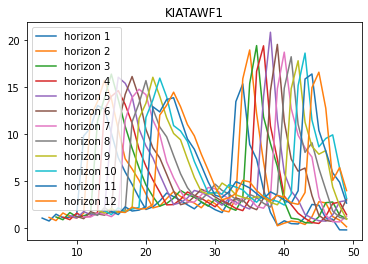

In [6]:
for h in range(1,HORIZONS+1):
    plt.plot(pred[f't+{h}'].values[:50], label=f'horizon {h}')
plt.legend()
plt.title(CENTRAL)
plt.show()

In [11]:
pred.head(13)

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,t+11,t+12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.079076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.770945,1.145526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.492279,0.815370,1.198332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.115267,1.623795,0.904531,1.181408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.167546,1.224265,1.667769,0.914059,1.342556,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test[:10]

70430    1.5
70431    0.7
70432    1.7
70433    1.0
70434    0.8
70435    0.6
70436    1.4
70437    0.9
70438    1.0
70439    1.4
Name: KIATAWF1, dtype: float64